In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as skpre
from sklearn import linear_model

!pip install scikit-learn

In [2]:
digits = datasets.load_digits()
digits_ftrs, digits_tgt = digits.data, digits.target

diabetes = datasets.load_diabetes()
diabetes_ftrs, diabetes_tgt = diabetes.data, diabetes.target

iris = datasets.load_iris()
tts = skms.train_test_split(iris.data, iris.target,
                           test_size=.75, stratify=iris.target)
(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt, iris_test_tgt) = tts 

In [3]:
dataset = np.array([1, 5, 10, 10, 17, 20, 35])
def compute_mean(data):
    return np.sum(data) / data.size
compute_mean(dataset)

14.0

In [4]:
def bootstrap_sample(data):
    N = len(data)
    idx = np.arange(N)
    bs_idx = np.random.choice(idx, N,
                             replace=True)
    return data[bs_idx]

In [5]:
bsms = []
for i in range(5):
    bs_sample = bootstrap_sample(dataset)
    bs_mean = compute_mean(bs_sample)
    bsms.append(bs_mean)
    
    print(bs_sample, "{:5.2f}".format(bs_mean))

[ 1 10  5 20 17 10 10] 10.43
[10 10 35 20  1 35 10] 17.29
[35  1  5 10 20 10  1] 11.71
[20  1 17 17  1 20 17] 13.29
[20 20 35 10  5  1 10] 14.43


In [6]:
print("{:5.2f}".format(sum(bsms) / len(bsms)))

13.43


In [7]:
def compute_bootstrap_statistic(data, num_boots, statistic):
    
    bs_stats = [statistic(bootstrap_sample(data)) for i in range(num_boots)]
    return np.sum(bs_stats) / num_boots 

bs_mean = compute_bootstrap_statistic(dataset, 100, compute_mean)
print("{:5.2f}".format(bs_mean))

14.24


In [8]:
def make_knn_statistic(new_example):
    def knn_statistic(dataset):
        ftrs, tgt = dataset[:,:-1], dataset[:,-1]
        knn = neighbors.KNeighborsRegressor(n_neighbors=3).fit(ftrs, tgt)
        return knn.predict(new_example)
    return knn_statistic

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample

def make_knn_statistic(data):
    ftrs, tgt = data[:, :-1], data[:, -1]
    knn = KNeighborsRegressor(n_neighbors=5)  
    knn.fit(ftrs, tgt)
    return knn.predict  

def compute_bootstrap_statistic(data, n_bootstrap, statistic_func):
    statistics = []
    for _ in range(n_bootstrap):
        sample = resample(data, replace=True)
        stat = statistic_func(sample[:, :-1])  # Remove the target column from the sample
        statistics.append(stat)
    return statistics

# Assuming diabetes_ftrs and diabetes_tgt are correctly defined elsewhere
diabetes_dataset = np.c_[diabetes_ftrs, diabetes_tgt]
ks = make_knn_statistic(diabetes_dataset)
compute_bootstrap_statistic(diabetes_dataset, 100, ks)

[array([193.8, 156.8, 155.4, 217. , 204.4, 156.2, 154.4, 207. , 124.4,
        204.4, 115. , 102. , 100.2, 133.2, 146.6, 272.4,  94. , 143.6,
        221.2, 153.6, 166.4,  65. , 107.8, 106.8, 241.2, 173.2, 131.2,
        192.8, 265.2, 226.6, 141.2,  81.8, 258.8, 136.6, 136.4, 156.8,
        228.4, 228.2, 126.6, 150.8, 134. , 169. ,  85. , 213.6, 101. ,
        167.4, 167.6, 183. , 170.6, 129.6, 261.6,  69.4, 227.6, 257. ,
         71.2, 101.2, 166.6, 172.6, 111.6, 169.4, 181.4,  84.8,  97.8,
        202. , 139.4,  94. , 124.4,  94.6, 220.4, 155.2, 116.6, 119.2,
        173. , 157.2, 150.2, 223.6, 100.2,  78.6,  83.8, 170.6, 170.6,
        137.4, 126.6, 100.2, 295.2, 157.4, 110. ,  74.6, 164.2, 130.4,
        137.4, 165. , 169. , 272.4, 120.2, 237.2, 124.4,  92.8, 146.8,
        108. , 173.2,  85. , 108. , 211.8, 101. , 183.2, 119.4, 181.8,
         75.8, 217. , 213.6,  83.8, 207. , 128.4, 180.2,  93. , 122.4,
         72. , 213.6, 239. , 238.6, 161.4,  64.2,  71.2, 242.2, 134.6,
      

In [10]:
def bagged_learner(dataset, base_model, num_models=10):
    
    models = []
    for n in num_models:
        bs_sample = np.random.choice(dataset, N, replace=True)
        models.append(base_model().fit(*bs_sample))
    return models

def bagged_predict_class(models, example):
    
    preds = [m.predict(example) for m in models]
    return ps.Series(preds).mode()

In [11]:
def my_boosted_classifier(base_classifier, bc_args,
                         examples, targets, M):
    N = len(examples)
    data_weights = np.full(N, 1/N)
    models, model_weights = [], []
    
    for i in range(M):
        weighted_dataset = reweight((examples, targets),
                                   data_weights)
        this_model = base_classifier(*bc_args).fit(*weighted_dataset)
        
        errors = this_model.predict(examples) != targets
        weighted_error = np.dot(weights, errors)
        
        this_model_wgt = np.log(1-weighted_error)/weighted_error
        data_weights *= np.exp(this_model_wgt * errors)
        data_weights /= data_weights.sum()
        
        models.append(this_model)
        model_weights.append(this_model_wgt)
        
        return ensemble.VotingClassifier(models,
                                        voting='soft',
                                        weights=model_weights)

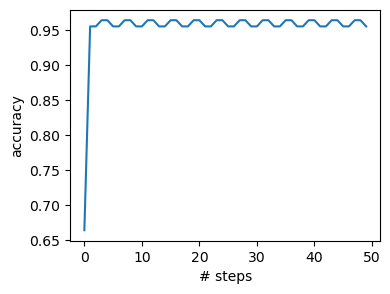

In [12]:
from sklearn import ensemble, metrics
import matplotlib.pyplot as plt

model = ensemble.AdaBoostClassifier()
stage_preds = (model.fit(iris_train_ftrs, iris_train_tgt)
              .staged_predict(iris_test_ftrs))
stage_scores = [metrics.accuracy_score(iris_test_tgt,
                                      pred) for pred in stage_preds]

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(stage_scores)
ax.set_xlabel('# steps')
ax.set_ylabel('accuracy');

In [ ]:
from sklearn import ensemble, tree
from sklearn.model_selection import cross_val_score

def fit_predict_score(model, ds):
    return skms.cross_val_score(model, *ds, cv=10).mean()

stump = tree.DecisionTreeClassifier(max_depth=1)
dtree = tree.DecisionTreeClassifier(max_depth=3)
forest = ensemble.RandomForestClassifier(max_features=1, max_depth=1)
tree_classifiers = {'stump': stump, 'dtree': dtree, 'forest': forest}

max_est = 100
data = (digits_ftrs, digits_tgt)
stump_score = fit_predict_score(stump, data)
tree_score = fit_predict_score(dtree, data)
forest_scores = [fit_predict_score(forest.set_params(n_estimators=n), 
                                   data)
                 for n in range(1, max_est+1)]

In [ ]:
stump_score = fit_predict_score(stump, data)
tree_score = fit_predict_score(dtree, data)
forest_scores = [fit_predict_score(forest.set_params(n_estimators=n), data) for n in range(1, max_est+1)]

fig, ax = plt.subplots(figsize=(4,3))

xs = list(range(1,max_est+1))
ax.plot(xs, np.repeat(stump_score, max_est), label='stump')
ax.plot(xs, np.repeat(tree_score, max_est), label='tree')
ax.plot(xs, forest_scores, label='forest')

ax.set_xlabel('Number of Trees in Forest')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right');

In [ ]:
def my_manual_cv(dataset, k=10):
    ds_ftrs, ds_tgt = dataset
    manual_cv = skms.StratifiedKFold(k).split(ds_ftrs,
                                             ds_tgt)
    
    for (train_idx, test_idx) in manual_cv:
        train_ftrs = ds_ftrs[train_idx]
        test_ftrs = ds_ftrs[test_idx]
        train_tgt = ds_ftrs[train_idx]
        test_tgt = ds_tgt[test_idx]
        
        yield (train_ftrs, test_ftrs,
              train_tgt, test_tgt)

In [ ]:
from sklearn.model_selection import StratifiedKFold

AdaBC = ensemble.AdaBoostClassifier
GradBC = ensemble.GradientBoostingClassifier
boosted_classifiers = {
    'boost(Ada)': AdaBC(learning_rate=2.0),
    'boost(Grad)': GradBC(loss='deviance')
}

mean_accs = {}
max_est = 100  

my_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in boosted_classifiers.items():
    model.set_params(n_estimators=max_est)
    accs = []
    for train_idx, test_idx in my_cv.split(digits_ftrs, digits_tgt):
        train_f, test_f = digits_ftrs[train_idx], digits_ftrs[test_idx]
        train_t, test_t = digits_tgt[train_idx], digits_tgt[test_idx]
        s_preds = (model.fit(train_f, train_t)
                  .staged_predict(test_f))
        s_scores = [metrics.accuracy_score(test_t, p) for p in s_preds]
        accs.append(s_scores)
    mean_accs[name] = np.array(accs).mean(axis=0)

mean_acc_df = pd.DataFrame.from_dict(mean_accs, orient='columns')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max_est = 100
stump_score = np.random.rand(max_est)  
tree_score = np.random.rand(max_est)   
forest_scores = np.random.rand(max_est)  

xs = list(range(1, max_est + 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
ax1.plot(xs, stump_score, label='stump')
ax1.plot(xs, tree_score, label='tree')
ax1.plot(xs, forest_scores, label='forest')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of Trees in Forest')
ax1.legend()

mean_acc_df.plot(ax=ax2)
ax2.set_ylim(0.0, 1.1)
ax2.set_xlabel('# Iterations')
ax2.legend(ncol=2)

plt.show()